In [12]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Read CSV, print
data = pd.read_csv("./train.csv")
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


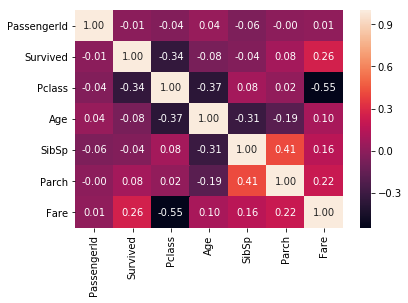

In [30]:
data_cor = data.corr()
sns.heatmap(data_cor, annot=True, fmt=".2f")

In [31]:
# get count of passengers by sex
fvsmc = data.groupby(['Sex']).size()

# create a dataframe for the count and sex
fvsmcarr = []
fvsmcarr.append({'Sex': 'female', 'Count': fvsmc.female})
fvsmcarr.append({'Sex': 'male', 'Count': fvsmc.male})
fvsmcdf = pd.DataFrame(fvsmcarr)
fvsmcdf = fvsmcdf[['Sex','Count']]
fvsmcdf

,Sex,Count
0,female,314
1,male,577


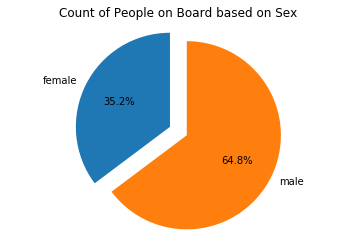

In [32]:
# pie chart for count and sex of passengers
fvsmfig, fvsmax = plt.subplots ()
fvsmax.pie(fvsmcdf['Count'],explode=[0.1,0.1], labels=(fvsmcdf['Sex']), autopct='%1.1f%%',startangle=90)
fvsmax.axis('equal')
fvsmpie = plt.title("Count of People on Board based on Sex")
plt.show()

In [33]:
# Count how many survived per gender
svss = data.groupby(['Sex', 'Survived']).size()
psvss = []
psvss.append({'Sex' : 'female', 'Survived' : 'false', 'Count' : svss.female[0],'Percentage' : svss.female[0]/svss.sum()})
psvss.append({'Sex' : 'female', 'Survived' : 'true', 'Count' : svss.female[1],'Percentage' : svss.female[1]/svss.sum()})
psvss.append({'Sex' : 'male', 'Survived' : 'false', 'Count' : svss.male[0],'Percentage' : svss.male[0]/svss.sum()})
psvss.append({'Sex' : 'male', 'Survived' : 'true', 'Count' : svss.male[1],'Percentage' : svss.male[1]/svss.sum()})
psvssdf = pd.DataFrame(psvss)
psvssdf = psvssdf[['Sex', 'Survived', 'Count', 'Percentage']]
psvssdf

,Sex,Survived,Count,Percentage
0,female,false,81,0.090909
1,female,true,233,0.261504
2,male,false,468,0.525253
3,male,true,109,0.122334


In [34]:
# Check survival of male and female passengers
sfvsma = []
sfvsmat = svss.female[1] + svss.male[1]
sfvsma.append({'Sex' : 'female', 'Survived' : 'true', 'Count' : svss.female[1],'Percentage' : svss.female[1]/sfvsmat})
sfvsma.append({'Sex' : 'male', 'Survived' : 'true', 'Count' : svss.male[1],'Percentage' : svss.male[1]/sfvsmat})

sfvsmadf = pd.DataFrame(sfvsma)
sfvsmadf = sfvsmadf[['Sex', 'Survived', 'Count', 'Percentage']]
sfvsmadf

,Sex,Survived,Count,Percentage
0,female,true,233,0.681287
1,male,true,109,0.318713


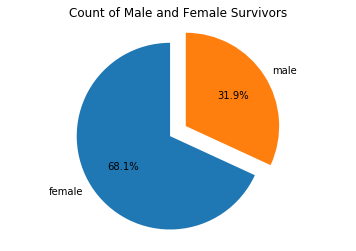

In [35]:
# pie chart for survival of male and female passengers
sfvsmfig, sfvsmax = plt.subplots ()
sfvsmax.pie(sfvsmadf['Count'],explode=[0.1,0.1], labels=(sfvsmadf['Sex']), autopct='%1.1f%%',startangle=90)
sfvsmax.axis('equal')
sfvsmpie = plt.title("Count of Male and Female Survivors")
plt.show()